

# Mnist Dataset Üzerinde Derin Öğrenme Algoritmalarının Karşılaştırılması



## ANN
****

In [ ]:
#Import
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt

import pydot
#import graphviz

from keras.utils.vis_utils import plot_model

In [25]:
###1. Load Data and Splot Data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [26]:
###2.Preprocess
#yeniden boyutlandırma
X_train = X_train.reshape(60000, 784)     
X_test = X_test.reshape(10000, 784)
#Daha verimli model için float veri tipi (Hassasiyet)
X_train = X_train.astype('float32')     
X_test = X_test.astype('float32')     
#Ölçeklme
X_train /= 255    
X_test /= 255
#Çıktı sayısı
classes = 10
#vektörünü --> matrise çevirme
Y_train = np_utils.to_categorical(Y_train, classes)     
Y_test = np_utils.to_categorical(Y_test, classes)

In [27]:
###3. Set up parameters
input_size = 784
#Günelleme için alınan veri kümesinin boyutu
batch_size = 100
#Ara katmandaki nöron sayısı
hidden_neurons = 400
#DöngÜ saysı
epochs = 30

In [28]:
###4.Build the model
model = Sequential()     
model.add(Dense(hidden_neurons, input_dim=input_size)) 
model.add(Activation('relu'))     
model.add(Dense(classes, input_dim=hidden_neurons)) 
model.add(Activation('softmax'))
 
model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')
history_ann=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 2.3363 - accuracy: 0.1172
Epoch 2/30
600/600 [==============================] - 2s 3ms/step - loss: 2.1707 - accuracy: 0.2437
Epoch 3/30
600/600 [==============================] - 2s 3ms/step - loss: 2.0187 - accuracy: 0.4011
Epoch 4/30
600/600 [==============================] - 2s 3ms/step - loss: 1.8780 - accuracy: 0.5497
Epoch 5/30
600/600 [==============================] - 2s 3ms/step - loss: 1.7475 - accuracy: 0.6418
Epoch 6/30
600/600 [==============================] - 2s 3ms/step - loss: 1.6265 - accuracy: 0.6913
Epoch 7/30
600/600 [==============================] - 2s 3ms/step - loss: 1.5152 - accuracy: 0.7220
Epoch 8/30
600/600 [==============================] - 1s 2ms/step - loss: 1.4130 - accuracy: 0.7437
Epoch 9/30
600/600 [==============================] - 2s 3ms/step - loss: 1.3199 - accuracy: 0.7614
Epoch 10/30
600/600 [==============================] - 2s 3ms/step - loss: 1.2360 - accuracy: 0.7753

In [29]:
###5.Test 
score_ann = model.evaluate(X_test, Y_test, verbose=1)
print('\n''Test accuracy:', score_ann[1]) 
#Test accuracy: 0.983

313/313 [==============================] - 0s 709us/step - loss: 0.5576 - accuracy: 0.8721

Test accuracy: 0.8720999956130981


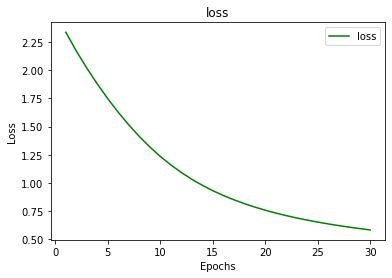

<Figure size 432x288 with 0 Axes>

In [60]:
loss = history_ann.history['loss']
epochs = range(1,31)
plt.plot(epochs, loss, 'g', label='loss')
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.savefig('Ann_loss.png')

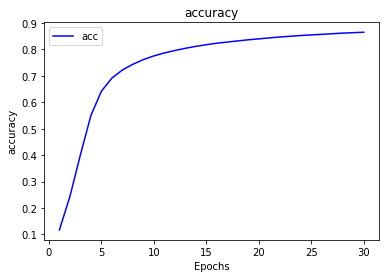

<Figure size 432x288 with 0 Axes>

In [61]:
acc = history_ann.history['accuracy']
epochs = range(1,31)
plt.plot(epochs, acc, 'b', label='acc')
plt.title('accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.savefig('Ann_acc.png')

## CNN
****

In [32]:
#Import
import numpy as np     
np.random.seed(0)  #for reproducibility            
 
from keras.datasets import mnist
from keras.models import Sequential 
from keras.layers import Dense, Activation
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers import Dropout, Flatten
 
from keras.utils import np_utils

In [33]:
###1. Load Data and Splot Data
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [34]:
###2.Preprocess
X_train = X_train.reshape(60000, 28, 28, 1)     
X_test = X_test.reshape(10000, 28, 28, 1)
 
X_train = X_train.astype('float32')     
X_test = X_test.astype('float32')     
X_train /= 255    
X_test /= 255
 
Y_train = np_utils.to_categorical(Y_train, classes)     
Y_test = np_utils.to_categorical(Y_test, classes)
 

In [35]:
###3. Set up parameters
input_size = 784
batch_size = 100    
hidden_neurons = 200
classes = 10    
epochs = 8

In [36]:
###4.Build the model
model = Sequential() 
model.add(Convolution2D(32, (3, 3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(Convolution2D(32, (3, 3)))  
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))  
                
model.add(Flatten())
  
model.add(Dense(hidden_neurons)) 
model.add(Activation('relu'))      
model.add(Dense(classes)) 
model.add(Activation('softmax'))
      
 
model.compile(loss='categorical_crossentropy', 
    metrics=['accuracy'], optimizer='adadelta')
 
history_cnn=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, 
    validation_split = 0.1, verbose=1)

Epoch 1/8
540/540 [==============================] - 30s 56ms/step - loss: 2.2742 - accuracy: 0.1897 - val_loss: 2.2421 - val_accuracy: 0.3313
Epoch 2/8
540/540 [==============================] - 31s 57ms/step - loss: 2.2169 - accuracy: 0.3440 - val_loss: 2.1653 - val_accuracy: 0.4790
Epoch 3/8
540/540 [==============================] - 32s 59ms/step - loss: 2.1337 - accuracy: 0.4796 - val_loss: 2.0508 - val_accuracy: 0.6022
Epoch 4/8
540/540 [==============================] - 29s 54ms/step - loss: 2.0045 - accuracy: 0.5780 - val_loss: 1.8782 - val_accuracy: 0.6865
Epoch 5/8
540/540 [==============================] - 29s 53ms/step - loss: 1.8132 - accuracy: 0.6494 - val_loss: 1.6341 - val_accuracy: 0.7375
Epoch 6/8
540/540 [==============================] - 29s 54ms/step - loss: 1.5584 - accuracy: 0.6956 - val_loss: 1.3415 - val_accuracy: 0.7830
Epoch 7/8
540/540 [==============================] - 28s 52ms/step - loss: 1.2870 - accuracy: 0.7336 - val_loss: 1.0663 - val_accuracy: 0.8138

In [62]:
###5.Test 
score_cnn = model.evaluate(X_test, Y_test, verbose=1)
print('Test accuracy:', score_cnn[1]) 
#Test accuracy: 0.9906

313/313 [==============================] - 22s 70ms/step - loss: 0.0527 - accuracy: 0.9834
Test accuracy: 0.9833999872207642


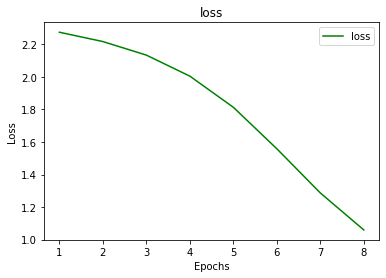

<Figure size 432x288 with 0 Axes>

In [63]:
loss = history_cnn.history['loss']
epochs = range(1,9)
plt.plot(epochs, loss, 'g', label='loss')
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.savefig('Cnn_loss.png')

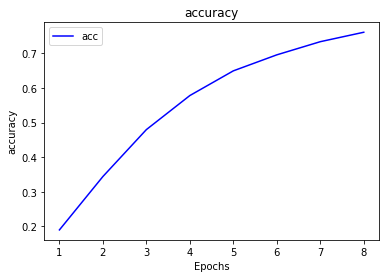

<Figure size 432x288 with 0 Axes>

In [64]:
acc = history_cnn.history['accuracy']
epochs = range(1,9)
plt.plot(epochs, acc, 'b', label='acc')
plt.title('accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.savefig('Cnn_acc.png')

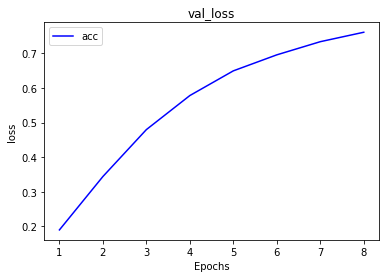

<Figure size 432x288 with 0 Axes>

In [65]:
val_loss = history_cnn.history['val_loss']
epochs = range(1,9)
plt.plot(epochs, acc, 'b', label='acc')
plt.title('val_loss')
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

plt.savefig('Ann_val_loss.png')

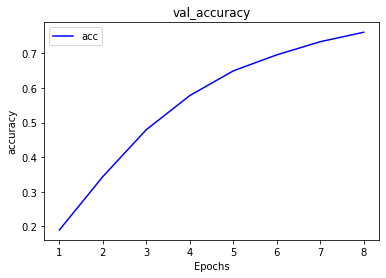

<Figure size 432x288 with 0 Axes>

In [66]:
val_accuracy = history_cnn.history['val_accuracy']
epochs = range(1,9)
plt.plot(epochs, acc, 'b', label='acc')
plt.title('val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.savefig('Ann_val_accuracy.png')

## RNN
----

In [50]:
#Import
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, TimeDistributed
from keras.layers import LSTM

from keras.utils.vis_utils import plot_model

In [51]:
#1 The data, split between train and test sets.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [52]:
###2.Preprocess
# Reshapes data to 4D for Hierarchical RNN.
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# Converts class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [53]:
#3Training parameters.
batch_size = 32
num_classes = 10
epochs = 5

# Embedding dimensions.
row_hidden = 128
col_hidden = 128

In [54]:
###4.Build the model
row, col, pixel = x_train.shape[1:]

# 4D input.
x = Input(shape=(row, col, pixel))

# Encodes a row of pixels using TimeDistributed Wrapper.
encoded_rows = TimeDistributed(LSTM(row_hidden))(x)

# Encodes columns of encoded rows.
encoded_columns = LSTM(col_hidden)(encoded_rows)

# Final predictions and model.
prediction = Dense(num_classes, activation='softmax')(encoded_columns)
model = Model(x, prediction)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training.
history_rnn=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 358s 191ms/step - loss: 0.4646 - accuracy: 0.8457 - val_loss: 0.1199 - val_accuracy: 0.9630
Epoch 2/5
1875/1875 [==============================] - 373s 199ms/step - loss: 0.1221 - accuracy: 0.9639 - val_loss: 0.0708 - val_accuracy: 0.9780
Epoch 3/5
1875/1875 [==============================] - 385s 205ms/step - loss: 0.0803 - accuracy: 0.9766 - val_loss: 0.0514 - val_accuracy: 0.9852
Epoch 4/5
1875/1875 [==============================] - 384s 205ms/step - loss: 0.0647 - accuracy: 0.9802 - val_loss: 0.0512 - val_accuracy: 0.9838
Epoch 5/5
1875/1875 [==============================] - 380s 203ms/step - loss: 0.0519 - accuracy: 0.9844 - val_loss: 0.0527 - val_accuracy: 0.9834


In [55]:
####5.Test
# Evaluation.
score_rnn = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_rnn[0])
print('Test accuracy:', score_rnn[1])

Test loss: 0.05269181355834007
Test accuracy: 0.9833999872207642


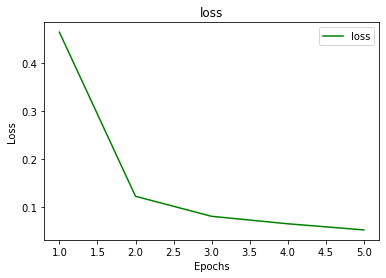

In [56]:
loss = history_rnn.history['loss']
epochs = range(1,6)
plt.plot(epochs, loss, 'g', label='loss')
plt.title('loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()



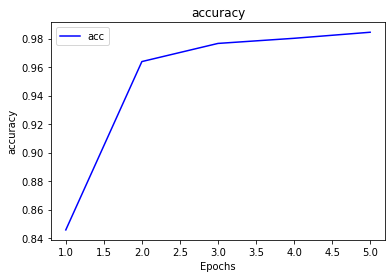

In [57]:
acc = history_rnn.history['accuracy']
epochs = range(1,6)
plt.plot(epochs, acc, 'b', label='acc')
plt.title('accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Conclusion

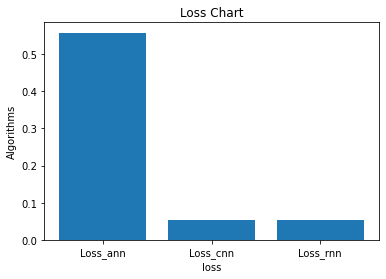

<Figure size 432x288 with 0 Axes>

In [67]:
import matplotlib.pyplot as plt

# Loss
# x-coordinates of left sides of bars 
left = [1, 2, 3]
  
# heights of bars
Loss = [score_ann[0], score_cnn[0], score_rnn[0]]
  
# labels for bars
tick_label = ['Loss_ann', 'Loss_cnn', 'Loss_rnn']
  
# plotting a bar chart
plt.bar(left, Loss, tick_label = tick_label,
        width = 0.8) #, color = ['red', 'green']
  
# naming the x-axis
plt.xlabel('loss')
# naming the y-axis
plt.ylabel('Algorithms')
# plot title
plt.title('Loss Chart')
  
# function to show the plot
plt.show()

plt.savefig('Conclusion_loss.png')

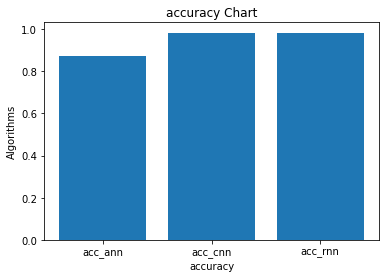

<Figure size 432x288 with 0 Axes>

In [68]:
#Accuracy

left = [1, 2, 3]
accs = [score_ann[1], score_cnn[1], score_rnn[1]] 
tick_label = ['acc_ann', 'acc_cnn', 'acc_rnn']
  
# plotting a bar chart
plt.bar(left, accs, tick_label = tick_label,
        width = 0.8) #, color = ['red', 'green']
  
plt.xlabel('accuracy')
plt.ylabel('Algorithms')
plt.title('accuracy Chart')
plt.show()

plt.savefig('Conclusion_acc.png')